# Análisis y Tratamiento de los Datos

In [0]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#Cargamos el DataSet
data = pd.read_csv("CreditCard.csv")
#Vista previa de la información contenida en el DataSet.
data.head() 

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [22]:
#Estructura de las columnas que tiene el DataSet.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
Unnamed: 0                    30000 non-null int64
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5     

In [23]:
### Diccionario con equivalencias de los campos MARRIAGE, SEX, EDUCATION. 
### Tomada de https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
diccionario = {'MARRIAGE': {1:'Casado', 2:'Soltero', 3:'Otros'},
       'SEX': {1:'Masculino', 2:'Femenino'},
        'EDUCATION': {1:'Posgrado', 2:'Universidad', 3:'Secundaria', 4:'Otros'}
       }
print(diccionario)

{'MARRIAGE': {1: 'Casado', 2: 'Soltero', 3: 'Otros'}, 'SEX': {1: 'Masculino', 2: 'Femenino'}, 'EDUCATION': {1: 'Posgrado', 2: 'Universidad', 3: 'Secundaria', 4: 'Otros'}}


<Figure size 432x288 with 0 Axes>

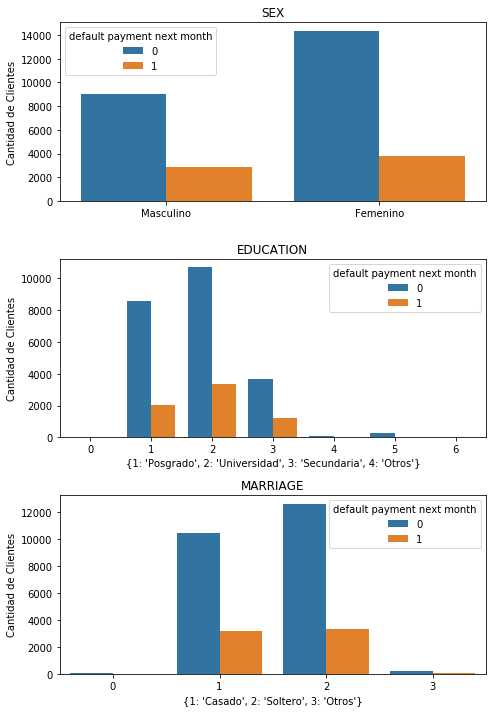

In [26]:
def graficoDataSet():  
  plt.clf()
  fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7,10))

  #if sns.__version__ >= '0.9.0':
  sns.countplot(x = 'SEX', hue='default payment next month', data=data, ax = axes[0])
  #plt.title('Distribución de Morosidad por Sexo del Cliente ')
  axes[0].set_title('SEX')
  axes[0].set_ylabel('Cantidad de Clientes')
  axes[0].set_xlabel('')
  axes[0].set_xticklabels(['Masculino', 'Femenino'])
  #plt.show()

  #if sns.__version__ >= '0.9.0':
  sns.countplot(x = 'EDUCATION', hue='default payment next month', data=data, ax = axes[1])
  #plt.title('Distribución de Morosidad por Educación ')
  axes[1].set_title('EDUCATION')
  axes[1].set_ylabel('Cantidad de Clientes')
  axes[1].set_xlabel(diccionario['EDUCATION'])
  #plt.show()

  #if sns.__version__ >= '0.9.0':
  sns.countplot(x = 'MARRIAGE', hue='default payment next month', data=data, ax = axes[2])
  #plt.title('Distribución de Morosidad por Estado Civil ')
  axes[2].set_title('MARRIAGE')
  axes[2].set_ylabel('Cantidad de Clientes')
  axes[2].set_xlabel(diccionario['MARRIAGE'])
  #plt.show()

  plt.tight_layout()
  plt.savefig('GraficoDataSet.png')

graficoDataSet()  

**Se puede apreciar que existen categorías las cuales no están descritas en el origen del DataSet (https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 
Estos casos serán incluidos com parte de la categoría Otros.**

In [27]:
data['EDUCATION'].replace({0:4, 5:4, 6:4}, inplace = True)
data['EDUCATION'].value_counts()

data['MARRIAGE'].replace({0:3}, inplace = True)
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

<Figure size 432x288 with 0 Axes>

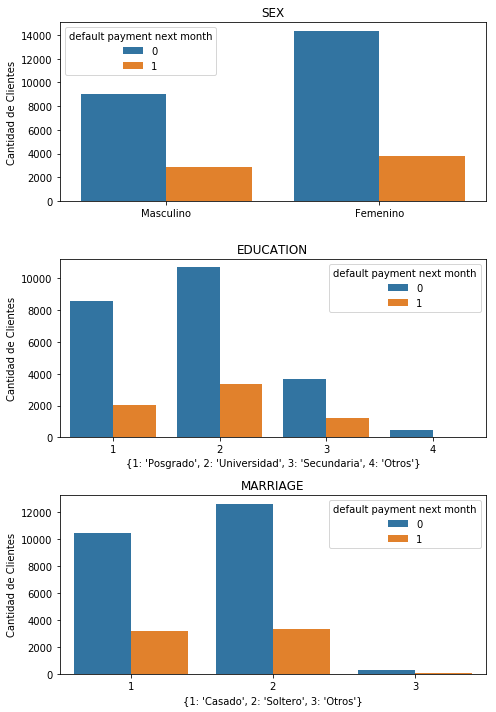

In [28]:
#Generamos el nuevo gráfico luego de modificar las variables categóricas.
graficoDataSet()

In [0]:
#Transformamos variables numericas a tipo categoricas.
data['SEX']=pd.to_numeric(data["SEX"], downcast = 'integer').astype('category')
data['EDUCATION']=pd.to_numeric(data["EDUCATION"], downcast = 'integer').astype('category')
data['MARRIAGE']=pd.to_numeric(data["MARRIAGE"], downcast = 'integer').astype('category')
data['default payment next month']=pd.to_numeric(data["default payment next month"], downcast = 'integer').astype('category')


In [31]:
### Valores unicos de cada variable categórica
variables_categoricas = [c for c in data if not pd.api.types.is_numeric_dtype(data[c])]
for v in variables_categoricas:
    print('Valores de la variable {0}: {1}'.format(v, data[v].unique()))

Valores de la variable SEX: [2, 1]
Categories (2, int64): [2, 1]
Valores de la variable EDUCATION: [2, 1, 3, 4]
Categories (4, int64): [2, 1, 3, 4]
Valores de la variable MARRIAGE: [1, 2, 3]
Categories (3, int64): [1, 2, 3]
Valores de la variable default payment next month: [1, 0]
Categories (2, int64): [1, 0]


In [32]:
#Renombramos algunas columnas
data.rename(columns = {'PAY_0': 'PAY_1', 
                     'default payment next month':'default'}, 
                                 inplace = True) 
data.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default'],
      dtype='object')

In [0]:
### Exportamos la data preprocesada
data.to_csv("CreditCardData_Processed.csv")

In [0]:
data.drop('ID', inplace = True, axis = 1)
data.drop('Unnamed: 0', inplace = True, axis = 1)


In [36]:
### DataSet Final para entrenamiento
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Entrenamiento

Separamos el conjunto de datos en Entrenamiento (60%) Validación (20%) y Test(20%)

In [37]:
from sklearn.model_selection import train_test_split

indices = data.index.values

### INICIO DE TU CÓDIGO
indices_trainval, indices_test = train_test_split(indices, test_size=0.2, random_state=0)
indices_train, indices_val = train_test_split(indices_trainval, test_size=0.25, random_state=0)
### FIN DE TU CÓDIGO

# El conjunto de entrenamiento es: data.loc[indices_train]
# El conjunto de validación es: data.loc[indices_val]
# El conjunto de prueba es: data.loc[indices_test]

print(indices_train.shape) #60%
print(indices_val.shape) #20%
print(indices_test.shape) #20%

(18000,)
(6000,)
(6000,)


array([ 8226, 10795,  9164, ...,  3759, 17843,  9120])

In [0]:
#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

feature_columns = data.columns.drop('default')

X = data[feature_columns].values.astype(float)
Y = data['default'].values.astype(int)

scaler = StandardScaler().fit(X[indices_train])
X_scaled = scaler.transform(X)

X_train = X_scaled[indices_train]
X_val = X_scaled[indices_val]
X_trainval = X_scaled[indices_trainval]
X_test = X_scaled[indices_test]

Y_train = Y[indices_train]
Y_val = Y[indices_val]
Y_trainval = Y[indices_trainval]
Y_test = Y[indices_test]

### INICIO DE TU CÓDIGO
pca = PCA().fit(X_train)
pca_loadings = pca.components_
pca_scores_train = pca.transform(X_train)
### FIN DE TU CÓDIGO

assert np.isclose(X_train, pca_scores_train @ pca_loadings).all(), 'Error al calcular pca_scores_train o pca_loadings'

array([[1.00000, 20000.00000, 2.00000, ..., 0.00000, 0.00000, 0.00000],
       [2.00000, 120000.00000, 2.00000, ..., 1000.00000, 0.00000,
        2000.00000],
       [3.00000, 90000.00000, 2.00000, ..., 1000.00000, 1000.00000,
        5000.00000],
       ...,
       [10974.00000, 80000.00000, 2.00000, ..., 1787.00000, 1700.00000,
        1500.00000],
       [10975.00000, 30000.00000, 1.00000, ..., 1100.00000, 0.00000,
        2100.00000],
       [10976.00000, 200000.00000, 2.00000, ..., 1098.00000, 1500.00000,
        1000.00000]])

Proporción de varianza explicada por los componentes principales:
[0.28430 0.17786 0.07174 0.06515 0.04431 0.04258 0.03977 0.03786 0.03722
 0.03195 0.02979 0.02926 0.02491 0.02254 0.01735 0.01158 0.01085 0.00831
 0.00580 0.00304 0.00184 0.00108 0.00095]


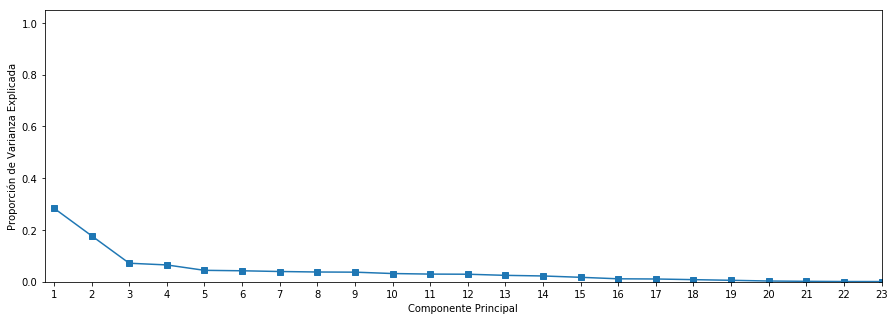


Proporción acumulada de varianza explicada por los componentes principales:
[0.28430 0.46216 0.53389 0.59904 0.64335 0.68593 0.72570 0.76356 0.80078
 0.83273 0.86252 0.89177 0.91668 0.93922 0.95657 0.96814 0.97899 0.98730
 0.99309 0.99614 0.99797 0.99905 1.00000]



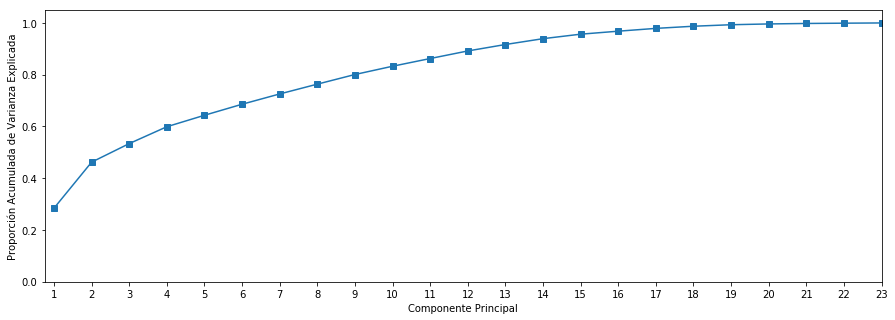

In [39]:
def plot_pca_var(pca_cum_var, label):
    num_components = pca_cum_var.shape[0]
    indices = range(1, num_components + 1)
    plt.figure(figsize=(15,5))
    plt.plot(indices, pca_cum_var, '-s')
    plt.ylabel(label)
    plt.xlabel('Componente Principal')
    plt.xlim(0.75,4.25)
    plt.ylim(0,1.05)
    plt.xticks(indices)
    plt.show()
    
### INICIO DE TU CÓDIGO
pca_cum_var = np.cumsum(pca.explained_variance_ratio_)
### FIN DE TU CÓDIGO

np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)})
print('Proporción de varianza explicada por los componentes principales:')
print(pca.explained_variance_ratio_)
plot_pca_var(pca.explained_variance_ratio_, 'Proporción de Varianza Explicada')

print()
print('Proporción acumulada de varianza explicada por los componentes principales:')
print(pca_cum_var)
print()
plot_pca_var(pca_cum_var, 'Proporción Acumulada de Varianza Explicada')

# Regresión Logística

In [40]:
from sklearn.linear_model import LogisticRegression

Cs = np.logspace(-4,-1,19)
print('Se probará regresión logística con los siguientes valores de C: ')
print(Cs)
print()

### INICIO DE TU CÓDIGO
mejor_modelo = None
mejor_score = 0
for C in Cs:
  modelo = LogisticRegression(C=C, solver='liblinear').fit(X_train, Y_train)

  score_val = modelo.score(X_val, Y_val)

  if score_val > mejor_score:
      mejor_score = score_val
      mejor_modelo = modelo
      
modelo_lr = mejor_modelo
### FIN DE TU CÓDIGO

print('Mejor valor de C encontrado:')
print(modelo_lr.get_params()['C'])

Se probará regresión logística con los siguientes valores de C: 
[0.00010 0.00015 0.00022 0.00032 0.00046 0.00068 0.00100 0.00147 0.00215
 0.00316 0.00464 0.00681 0.01000 0.01468 0.02154 0.03162 0.04642 0.06813
 0.10000]

Mejor valor de C encontrado:
0.0001467799267622069


In [41]:
### INICIO DE TU CÓDIGO
probabilidades_val = modelo_lr.predict_proba(X_val)[:,1]
### FIN DE TU CÓDIGO

print('Probabilidad asignada a cada instancia del conjunto de validación:')
print(probabilidades_val)

assert probabilidades_val.shape == Y_val.shape, 'Dimensiones incorrectas. Sólo se requiere las probabilidades para la clase positiva'
assert (0 <= probabilidades_val).all() & (probabilidades_val <= 1).all(), 'Valores de probabilidad inválidos'

Probabilidad asignada a cada instancia del conjunto de validación:
[0.31973 0.32595 0.37763 ... 0.40546 0.49473 0.35744]


In [0]:
from sklearn import metrics

def print_binary_confusion_matrix(y_true, y_pred):
  confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
  TN = confusion_matrix[0,0]
  FN = confusion_matrix[1,0]
  FP = confusion_matrix[0,1]
  TP = confusion_matrix[1,1]
  
  ### INICIO DE TU CÓDIGO
  exactitud = (TP+TN)/(TP+FP+TN+FN)
  precision = TP/(TP+FP)
  exhaustividad = TP/(TP+FN)
  ### FIN DE TU CÓDIGO

  print ('              +-----------------+')
  print ('              |   Predicción    |')
  print ('              +-----------------+')
  print ('              |    +   |    -   |')
  print ('+-------+-----+--------+--------+')
  print ('| Valor |  +  |  {:5d} |  {:5d} |'.format(TP, FN) )
  print ('| real  +-----+--------+--------+')
  print ('|       |  -  |  {:5d} |  {:5d} |'.format(FP, TN) )
  print ('+-------+-----+--------+--------+')
  print('Exactitud     : {:.3f}'.format(exactitud))
  print('Precisión     : {:.3f}'.format(precision))
  print('Exhaustividad : {:.3f}'.format(exhaustividad))
  print()


In [43]:
# Volvemos a ajustar con el conjunto de entrenamiento + validación
modelo_lr.fit(X_trainval, Y_trainval)

print('Conjunto de entrenamiento + validación:')
print_binary_confusion_matrix(Y_trainval, modelo_lr.predict(X_trainval))

print('Conjunto de prueba :')
print_binary_confusion_matrix(Y_test, modelo_lr.predict(X_test))

Conjunto de entrenamiento + validación:
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |   1662 |   3677 |
| real  +-----+--------+--------+
|       |  -  |    924 |  17737 |
+-------+-----+--------+--------+
Exactitud     : 0.808
Precisión     : 0.643
Exhaustividad : 0.311

Conjunto de prueba :
              +-----------------+
              |   Predicción    |
              +-----------------+
              |    +   |    -   |
+-------+-----+--------+--------+
| Valor |  +  |    397 |    900 |
| real  +-----+--------+--------+
|       |  -  |    207 |   4496 |
+-------+-----+--------+--------+
Exactitud     : 0.816
Precisión     : 0.657
Exhaustividad : 0.306



In [45]:
modelo_lr.score(X_test, Y_test)

0.8155